In [1]:
import sys
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import os
import inspect

project_path = os.path.abspath( os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) + "/../")
sys.path.insert(0, project_path)

from Program.Objects.Human import Human
from Program.Objects.Issue import Issue
from Program.Objects.Machine import Machine
from Program.Objects.MaintenanceWorkOrder import MaintenanceWorkOrder
from Program.Objects.Tag import Tag

from Program.Database.Database_Properties import *
from Program.Database.Database import *
from Program.Database.Main import *

from Program.KPI.KPI import *


from Program.Others.MyDate import *

# DATABASE

## FILES

### NIST server

### Greystone

In [2]:
PassWord = 'GREYSTONE!!'
file = os.path.join(project_path , 'Data_CSV', 'GreyStone_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 15,
                NodeHuman.VALUE_OPERATOR.value: 13,

                NodeTag.VALUE_ITEM.value: 2,
                NodeTag.VALUE_PROBLEM.value: 3,
                NodeTag.VALUE_SOLUTION.value: 4,

                NodeMachine.VALUE_MACHINE.value: 7,
                NodeIssue.VALUE_MACHINE_DOWN.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 0,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 1,
                NodeIssue.VALUE_PART_PROCESS.value: 16,
                
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value: 9,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value + "2": 10,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value: 11,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value + "2": 12
                }

def date_cleanizer(date, time="0000"):
    """
    clean the date from GS data

    :param date: the date
    :param time: the time
    :return: a DateTime
    """

####    DATE ####
    if date is "":
        return None

    date = date.replace(" ","").split("/")

    date[2] = "20" + date[2]

    if len(date[0]) is 1:
        date[0] = "0" + date[0]
    else:
        date[0] = date[0]

    if len(date[1]) is 1:
        date[1] = "0" + date[1]
    else:
        date[1] = date[1]

#### TIME ####
    while len(time) < 4:
        time = "0" + time.replace(" ", "")

    return datetime(year=int(date[2]), month=int(date[0]), day=int(date[1]), hour=int(time[:2]), minute=int(time[2:]))

### Psu

In [ ]:
PassWord = 'PSU!!'
file = os.path.join(project_path , 'Data_CSV', 'Psu_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 18,

                NodeMachine.VALUE_MACHINE.value: 3,
                NodeMachine.VALUE_TYPE.value:6,
                NodeMachine.VALUE_MANUFACTURER.value:5,
                NodeMachine.VALUE_LOCASION.value:4,


                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 11,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 19,
                NodeIssue.VALUE_DESCRIPTION_CAUSE.value:12,
                NodeIssue.VALUE_MACHINE_DOWN.value: 13,
                }

### Hvac

In [ ]:
PassWord = 'HVAC!!'
file = os.path.join(project_path , 'Data_CSV', 'Hvac_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 10,
                NodeHuman.VALUE_OPERATOR.value: 43,

                NodeMachine.VALUE_MACHINE.value: 7,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 247,
                }

### Auto

In [ ]:
PassWord = 'AUTO!!'
file = os.path.join(project_path , 'Data_CSV', 'Auto_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 4,
                NodeHuman.VALUE_OPERATOR.value: 11,
                NodeHuman.VALUE_CRAFTS.value: 16,
                NodeHuman.VALUE_SKILLS.value: 17,

                NodeMachine.VALUE_MACHINE.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 7,
                }

### Mine

In [ ]:
PassWord = 'MINE!!'
file = os.path.join(project_path , 'Data_CSV', 'Mine_Data.csv')

localization = {}

## ACTION

### Connect

In [3]:
database = DatabaseNeo4J("bolt://127.0.0.1:7687", "neo4j", PassWord)

## Indexs

In [7]:
database.createIndexes()

In [6]:
database.dropIndexes()

## Data

In [8]:
GraphDatabaseCsv(database, file, localization, date_cleanizer)

100%|██████████| 3438/3438 [00:45<00:00, 76.18it/s]


In [5]:
database.deleteData()

# KPI

In [22]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 20


machine_name = "machine.%s"%NodeMachine.PROPERTY_NAME.value

technician_name = "technician.%s"%NodeHuman.PROPERTY_NAME.value
operator_name = "operator.%s"%NodeHuman.PROPERTY_NAME.value

issue_problem = "issue.%s"%NodeIssue.PROPERTY_DESCRIPTION_PROBLEM.value
issue_solution = "issue.%s"%NodeIssue.PROPERTY_DESCRIPTION_SOLUTION.value

tag_item = "item.%s"%NodeTag.PROPERTY_KEYWORD.value
tag_problem = "problem_action.%s"%NodeTag.PROPERTY_KEYWORD.value
tag_solution = "solution_action.%s"%NodeTag.PROPERTY_KEYWORD.value

issue_date_issue = "issue.%s"%NodeIssue.PROPERTY_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value
issue_date_close = "issue.%s"%NodeIssue.PROPERTY_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value

time = "time"
count = "count"
avg = "average"

## BarPlot something Per something

MT per Problem : "lyle cookson" (technician_name, issue_problem)

In [19]:
filter_value= technician_name    # what do you want to represent
x_value= issue_problem     # over what value

dataframe = abstract_kpi_time_mwo(database=database, x_value=x_value, filter_value=filter_value, time_value=time, count_value=count,average_value=avg )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

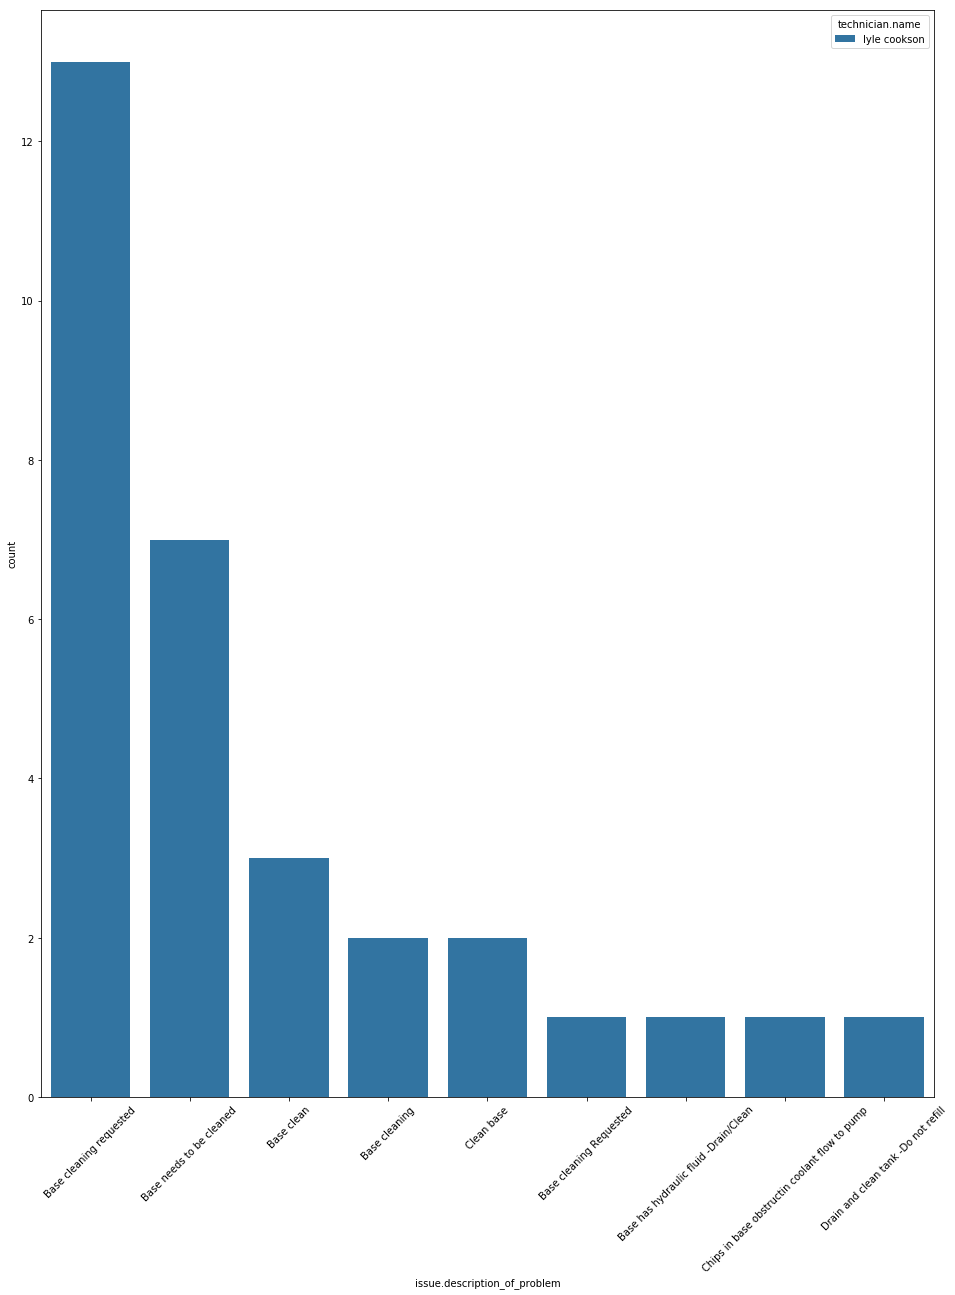

In [23]:
y_value = count     # Number of issue
#y_value = time       # sum of time spend
#y_value = avg       # avereage time spend

filter = ["lyle cookson"]   # filter on your "filter_value"

data=dataframe[(dataframe[filter_value].isin(filter))].sort_values(by=[y_value], ascending=False)
data= data[data[y_value].notnull()]     #comment if you want the null values to appeared

ax = sns.barplot(x=x_value, y=y_value, hue=filter_value,  data=data)
plt.xticks(rotation=45)

## TimeLinePlot something overtime

In [26]:
filter_value= machine_name    # what do you want to represent
date = issue_date_issue

dataframe = abstract_kpi_timeline(database=database, date_value=date, filter_value=filter_value, time_value=time, count_value=count,average_value=avg )

(array([ 735689.,  735780.,  735872.,  735964.,  736055.,  736146.,
         736238.,  736330.]), <a list of 8 Text xticklabel objects>)

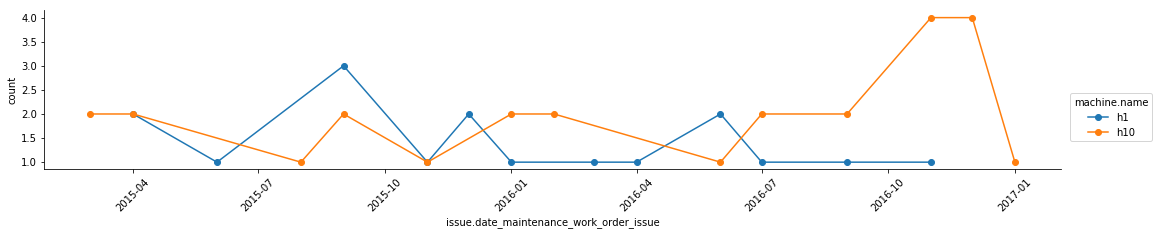

In [27]:
y_value = count     # Number of issue
#y_value = time       # sum of time spend
#y_value = avg       # avereage time spend


data = dataframe[[y_value,filter_value,date]]

# data = dataframe[[y_value,filter_value,date]]
# temps = data[date][1].to_datetime()
# print(temps.month)

filter = ["h10", "h1"]   # filter on your "filter_value"
data = data[data[filter_value].isin(filter)]

g = sns.FacetGrid(data, hue=filter_value, size=3, aspect=5)
g.map(plt.plot, date, y_value, marker='o').add_legend()
plt.xticks(rotation=45)

In [ ]:
dataframe


# KPI using Object

In [ ]:
import sys
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import os
import inspect

project_path = os.path.abspath( os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) + "/../")
sys.path.insert(0, project_path)

from Program.Objects.Human import Human
from Program.Objects.Issue import Issue
from Program.Objects.Machine import Machine
from Program.Objects.MaintenanceWorkOrder import MaintenanceWorkOrder
from Program.Objects.Tag import Tag

from Program.Database.Database_Properties import *
from Program.Database.Database import *
from Program.Database.Main import *

from Program.KPI.KPI import *


from Program.Others.MyDate import *


In [ ]:
query, property = Machine.get_all_machine_from_database(manufacturer = True, type = True)

In [ ]:
print(query)
print(property)

In [ ]:
property